# Phase current estimator

This notebook will investiate some ideas on phase current estimation.

The phase currents will be denoted
$$
I_U, I_V, I_W
$$
The estimated phase currents will be denoted
$$
\hat{I}_U, \hat{I}_V, \hat{I}_W
$$
The measured phase currents will be denoted
$$
I^*_U, I^*_V, I^*_W
$$

## Example from logs
We notice that the different phases have different noise amplitude.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def find_latest_log():
    folder = '../logger/logs'
    logs = os.listdir(folder)
    return folder + os.sep + logs[-1]

def get_log_phases(logfile):
    #logfile = find_latest_log()

    #print(logfile)
    df = pd.read_csv(logfile)

    t = df['time_ms']*1/1000
    t = t - t[0]

    #Phase current
    U = df['signal_2']
    V = df['signal_3']
    W = df['signal_4']
    return t,U,V,W


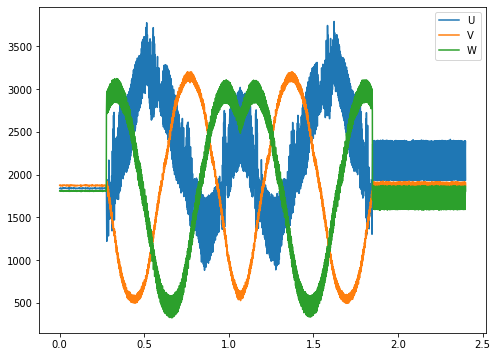

In [16]:
t,U,V,W = get_log_phases('../logger/logs\log_230924_1910.csv')

plt.figure(figsize=(8,6))
plt.plot(t,U,label='U')
plt.plot(t,V,label='V')
plt.plot(t,W,label='W')

plt.legend()


# TODO... 